In [26]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import time
data = []
datapath = '/home/bigdatas16/1101.csv'
data = pd.read_csv(datapath)
 
# Close Rise Ratio 漲幅比
def RR(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Close'][item]-data['Close'][item-1])/data['Close'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR']=tmpSeries
RR(data)
# 相對強弱指標(RSI) 建議6
def RSI(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI'+str(day)] = tmpSeries

# High Rise Ratio 漲幅比
def RR_H(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['High'][item]-data['High'][item-1])/data['High'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR_H']=tmpSeries
RR_H(data)
# 相對強弱指標(RSI) 建議6
def RSI_H(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            bolRise = data['RR_H'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR_H'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_H'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR_H'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI_H'+str(day)] = tmpSeries
    
# Volumn_n Rise Ratio 漲幅比
def RR_V(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Volume_m'][item]-data['Volume_m'][item-1])/data['Volume_m'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR_V']=tmpSeries
RR_V(data)   
# 相對強弱指標(RSI) 建議6
def RSI_V(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR_V'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR_V'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_V'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR_V'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI_V'+str(day)] = tmpSeries
    
start = time.time()       
for i in range(2,18):
    RSI(data,i) 
for i in range(2,18):
    RSI_V(data,i) 
for i in range(2,18):
    RSI_H(data,i)
end = time.time()
print "Create features rsi : Time taken = %f second"%(end - start)

data = data.drop(data.index[4620])    

Populating the interactive namespace from numpy and matplotlib
Create features rsi : Time taken = 321.789102 second


In [27]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,RR,...,RSI_H8,RSI_H9,RSI_H10,RSI_H11,RSI_H12,RSI_H13,RSI_H14,RSI_H15,RSI_H16,RSI_H17
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,-1.269841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,-1.607717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,-1.879085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,-1.165695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 60 columns):
Date        4620 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
RR          4620 non-null float64
RR_H        4620 non-null float64
RR_V        4620 non-null float64
RSI2        4620 non-null float64
RSI3        4620 non-null float64
RSI4        4620 non-null float64
RSI5        4620 non-null float64
RSI6        4620 non-null float64
RSI7        4620 non-null float64
RSI8        4620 non-null float64
RSI9        4620 non-null float64
RSI10       4620 non-null float64
RSI11       4620 non-null float64
RSI12       4620 non-null float64
RSI13       4620 non-null float64
RSI14       4620 non-null float64
RSI15       4620 non-null float64
RSI16     

In [29]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries
UP_DOWN(data)

data1 = data.drop(['Date', 'Open', 'High','Low','Close','Volume_n','Volume_m','return','PE','RR','RR_V','RR_H'], axis=1)

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 49 columns):
RSI2       4620 non-null float64
RSI3       4620 non-null float64
RSI4       4620 non-null float64
RSI5       4620 non-null float64
RSI6       4620 non-null float64
RSI7       4620 non-null float64
RSI8       4620 non-null float64
RSI9       4620 non-null float64
RSI10      4620 non-null float64
RSI11      4620 non-null float64
RSI12      4620 non-null float64
RSI13      4620 non-null float64
RSI14      4620 non-null float64
RSI15      4620 non-null float64
RSI16      4620 non-null float64
RSI17      4620 non-null float64
RSI_V2     4620 non-null float64
RSI_V3     4620 non-null float64
RSI_V4     4620 non-null float64
RSI_V5     4620 non-null float64
RSI_V6     4620 non-null float64
RSI_V7     4620 non-null float64
RSI_V8     4620 non-null float64
RSI_V9     4620 non-null float64
RSI_V10    4620 non-null float64
RSI_V11    4620 non-null float64
RSI_V12    4620 non-null float64
RS

In [31]:
#cols = data1.columns.tolist()
#cols[48]

In [32]:
data1 = data1.fillna(-1)
cols = data1.columns.tolist()
cols[48]
data1 = data1[[cols[48]] + cols[0:47]]
n = len(data['Date'])/5
m = len(data['Date']) - n
train_data = data1.iloc[:m,:]

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3696 entries, 0 to 3695
Data columns (total 48 columns):
UP_DOWN    3696 non-null int64
RSI2       3696 non-null float64
RSI3       3696 non-null float64
RSI4       3696 non-null float64
RSI5       3696 non-null float64
RSI6       3696 non-null float64
RSI7       3696 non-null float64
RSI8       3696 non-null float64
RSI9       3696 non-null float64
RSI10      3696 non-null float64
RSI11      3696 non-null float64
RSI12      3696 non-null float64
RSI13      3696 non-null float64
RSI14      3696 non-null float64
RSI15      3696 non-null float64
RSI16      3696 non-null float64
RSI17      3696 non-null float64
RSI_V2     3696 non-null float64
RSI_V3     3696 non-null float64
RSI_V4     3696 non-null float64
RSI_V5     3696 non-null float64
RSI_V6     3696 non-null float64
RSI_V7     3696 non-null float64
RSI_V8     3696 non-null float64
RSI_V9     3696 non-null float64
RSI_V10    3696 non-null float64
RSI_V11    3696 non-null float64
RSI_

In [34]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])


assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_H2","RSI_H3"
                                       ,"RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16"], outputCol="features")

hyperparametr tuning cross validation 5 folds

In [35]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])


assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_H2","RSI_H3"
                                       ,"RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16"], outputCol="features")
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])
    
frames = [i for i in range(1,6)]
for i in range(0,5):
    #print(i)
    frames[i] = pd.concat([cross_data_pandas[(i+1)%5],cross_data_pandas[(i+2)%5],cross_data_pandas[(i+3)%5],cross_data_pandas[(i+4)%5]])
    result_sql = [i for i in range(1,6)]

for i in range(0,5):   
    result_sql[i] = sql_sc.createDataFrame(frames[i])   
    
assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_H2","RSI_H3"
                                       ,"RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16"],outputCol="features")
for i in range(0,5):  
    result_sql[i] = assembler1.transform(result_sql[i])

start = time.time()

cv5_test_error = []    
numTrees_maxDepth = []    
for j in range(1,7,1):
    for k in range(1,21,1):
        Test_Error = []
        for i in range(0,5):
            labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_sql[i])
            featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_sql[i])
            #rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
            rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = k,maxDepth = j)
            # Chain indexers and forest in a Pipeline
            pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
            model = pipeline.fit(result_sql[i])
            predictions = model.transform(cross_sql[i])
            evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
            accuracy = evaluator.evaluate(predictions)
            print("Test Error(%d) = %g" % (i,1.0 - accuracy))
            Test_Error.append(1.0 - accuracy)
        cv5_test_error.append(mean(Test_Error))
        numTrees_maxDepth.append([i,j])

end = time.time()
print "Cross Validation 5 Folds Hyperparameter Tuning : Time taken = %f second"%(end - start)
        
mintest = np.min(cv5_test_error)
c = []
for i in range(len(cv5_test_error)):
    c.append(np.min(cv5_test_error) == cv5_test_error[i])
    
for i in range(len(cv5_test_error)):    
    if c[i] == True:
        print(numTrees_maxDepth[i],mintest)       

Test Error(0) = 0.435865
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.478178
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.461272
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.479025
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.478178
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.478178
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.478178
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485
Test Error(0) = 0.478178
Test Error(1) = 0.519021
Test Error(2) = 0.568683
Test Error(3) = 0.570785
Test Error(4) = 0.561485


predict

In [36]:
train_data = data1.iloc[:m,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[m:,:]
test_sql = sql_sc.createDataFrame(test_data)

assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_H2","RSI_H3"
                                       ,"RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16"],outputCol="features")
train_sql = assembler1.transform(train_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = 4,maxDepth = 6)
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(train_sql)
assembler = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_H2","RSI_H3"
                                       ,"RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16"],outputCol="features")
test_sql = assembler.transform(test_sql)
predictions = model.transform(test_sql)
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
accuracy

0.4881807318910553

In [37]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
prediction_1101 = predictions.select("prediction", "indexedLabel")
prediction_1101_pandas = prediction_1101.toPandas()
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,424,83
1.0,339,78


In [39]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

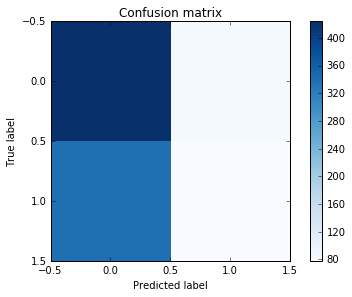

In [40]:
plot_confusion_matrix(cm)
plt.show()

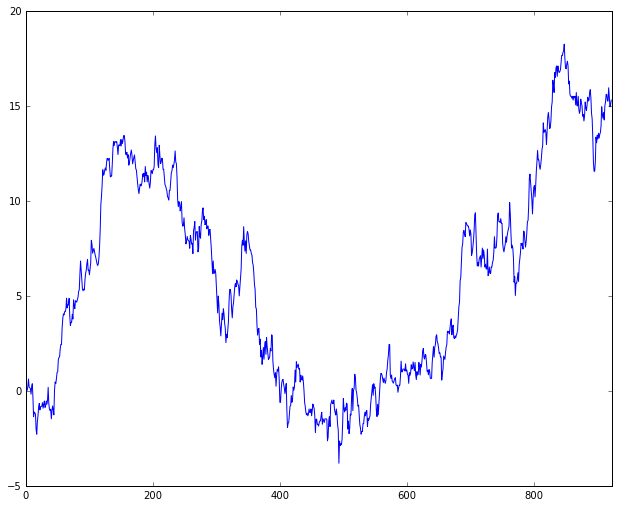

In [41]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = result2['Cl - Op'] * result2['prediction']
a = result2['profit'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [42]:
result2['processing fee1'] = np.where(result2['prediction'] == 1,(result2['Close']*(4.425/1000.0) + result2['Open']*(1.425/1000.0))*1
                                      ,(result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)))
result2['profit_r_fee'] = result2['profit'] -  result2['processing fee1']

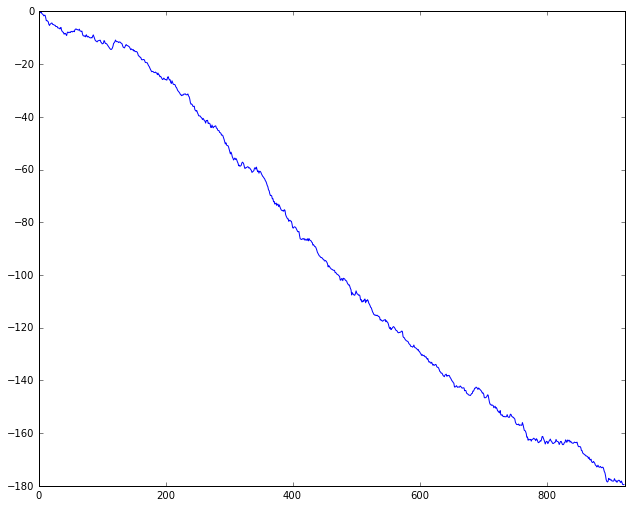

In [43]:
b = result2['profit_r_fee'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
b.plot()

In [44]:
result2['profit2'] = 0.0
#len(result2)
result2['profit2'][1]
result2['profit2'][0] = 0 #(-1) * result2['Open'][0]

for i in range(0,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1:
        result2['profit2'][i+1] = result2['profit2'][i] + (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] 
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] + result2['Close'][i]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['profit2'][i+1] = result2['profit2'][i] 


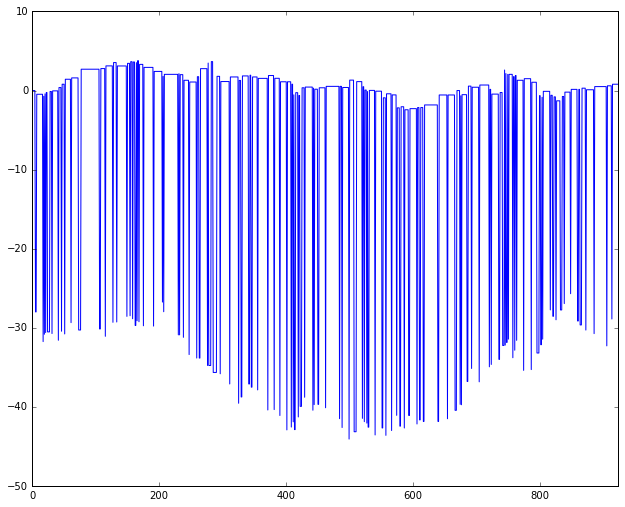

In [45]:
result2['profit2'].plot()

In [46]:
result2['processing_fee_2'] = 0.0

In [47]:
result2['processing_fee_2'][0] = 0#(-1) * result2['Open'][0]

for i in range(0,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + (-1) * result2['Open'][i+1] - (result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + result2['Open'][i+1] - (result2['Open'][i+1])*(1.425/1000.0)
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

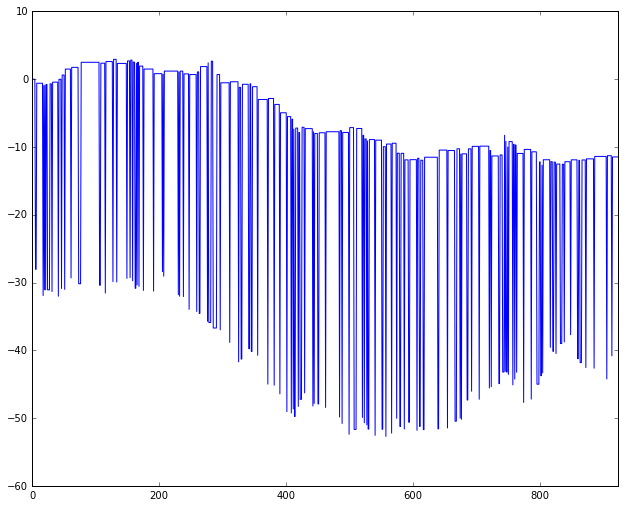

In [48]:
result2['processing_fee_2'].plot()#[1101:2301].plot()